# <center> <h1> 🔳 👨‍💻🔲   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [16]:
img = cv2.imread("Photo/tash.jpg")     #load images from local file
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      #convert image from bgr to rgb 
plt.figure(figsize=(15,10))     #plot figure size
plt.imshow(img)    #show the picture
plt.show()

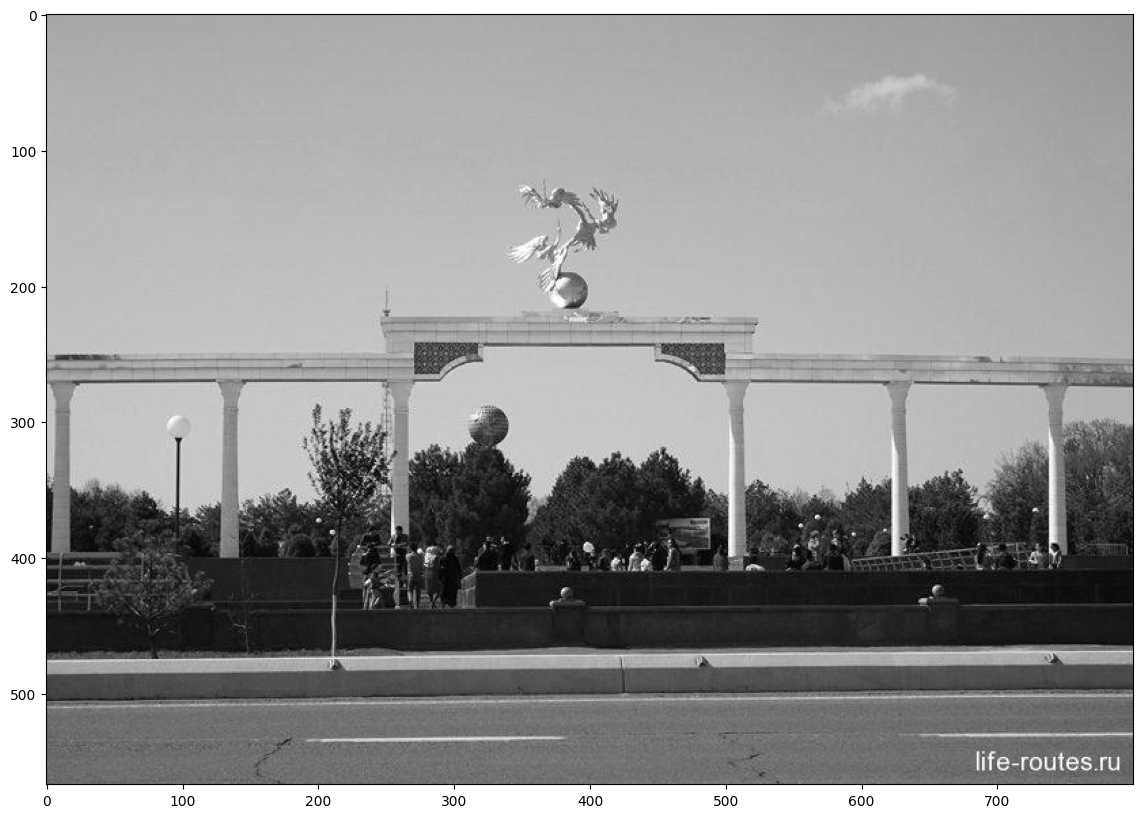

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)     #convert image from bgr to rgb 
plt.figure(figsize=(15,10))     #plot figure size
plt.imshow(img,cmap='gray')     #show the picture
plt.show()

# Sobel X kernel  ↔️
* Finds edges along the x-axis

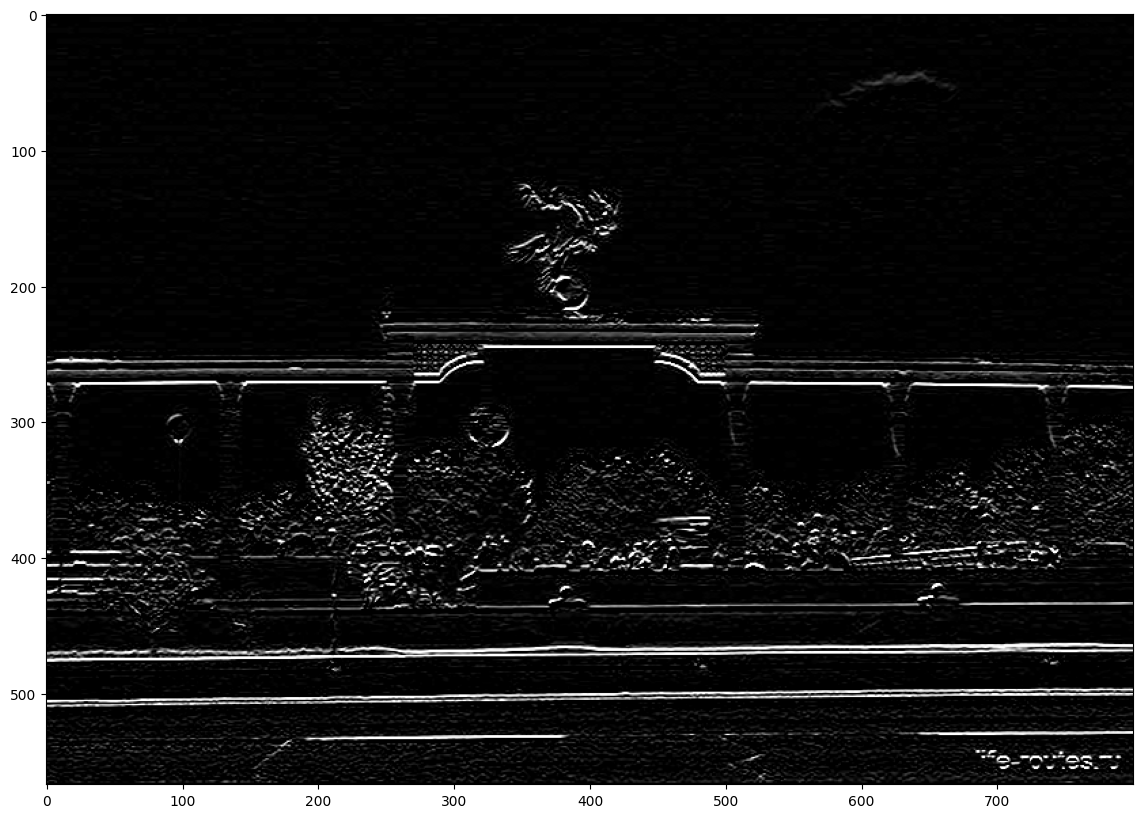

In [4]:
sobel_x = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])

x_filter_img = cv2.filter2D(img,-1,sobel_x)     # -1 means that the image will be output in the same size as it came in
plt.figure(figsize=(15,10))
plt.imshow(x_filter_img,cmap='gray')
plt.show()

# Sobel Y kernel ↕️
* Finds edges along the y-axis

In [5]:
sobel_y = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

y_filter_img = cv2.filter2D(img,-1,sobel_y)
plt.figure(figsize=(15,10))
plt.imshow(y_filter_img,cmap='gray')
plt.show()

# How the kernel works

<img src="Photo/kernel.png">


If during the calculation the sum is greater than 255, it is taken as 255

If there is -(minus) number, it is set to 0

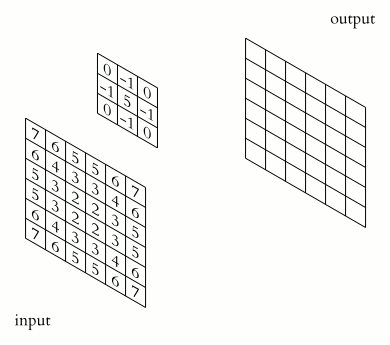

# Edge detection kernel ↕️ ↔️
* Finds edges along the x-axis and y-axis

In [6]:
edge_kernel = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])

edge_filter_img = cv2.filter2D(img,-1,edge_kernel)
plt.figure(figsize=(15,10))
plt.imshow(edge_filter_img,cmap='gray')
plt.show()

# Sharpen kernel
* The sharpen kernel emphasizes differences in adjacent pixel values. This makes the image look more vivid.

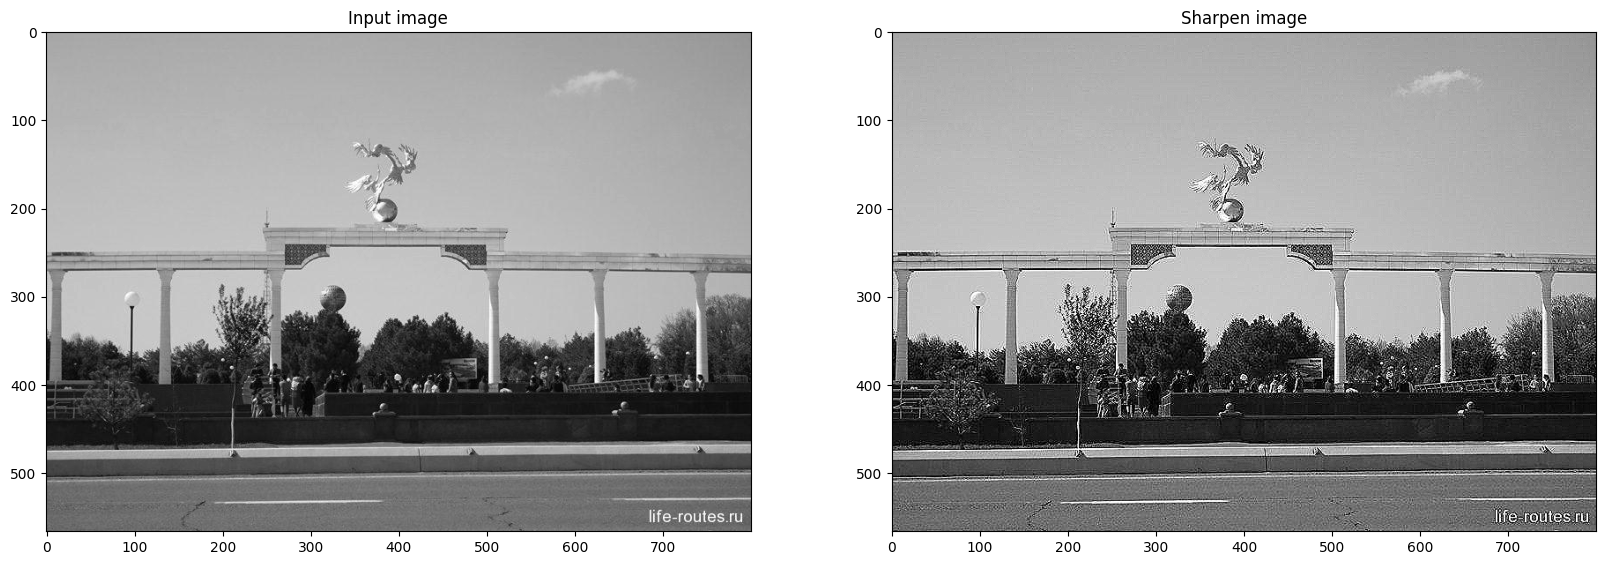

In [7]:
sharpen = np.array([[0,-1,0],
                [-1,5,-1],
                [0,-1,0]])

sharpen_filter_img = cv2.filter2D(img,-1,sharpen)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.title("Input image")
plt.imshow(img,cmap="gray")

plt.subplot(122)
plt.title("Sharpen image")
plt.imshow(sharpen_filter_img,cmap="gray")
plt.show()

# Guassian Blur kernel

In [ ]:
1 2 1
2 4 2 * 1/16 = 1    # Guassian 3x3
1 2 1

1 2 4 2 1
2 4 8 4 2
4 8 16 8 4 * 1/256 = 1   # Guassian 5x5
2 4 8 4 2
1 2 4 2 1

1 1 1 
1 1 1 * 1/9 = 1     # Box kenrel
1 1 1

# Box kernel

* The Box kernel used for dissimilarity computation  

In [8]:
box_kernel = np.array([[1,1,1],
                      [1,1,1],
                      [1,1,1]]) * 1/9

box_filter_img = cv2.filter2D(img,-1,box_kernel)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.title("Input image")
plt.imshow(img,cmap="gray")

plt.subplot(122)
plt.title("Box image")
plt.imshow(box_filter_img,cmap="gray")
plt.show()


# Guassian blur
* This is an effect commonly used to reduce image noise and reduce detail

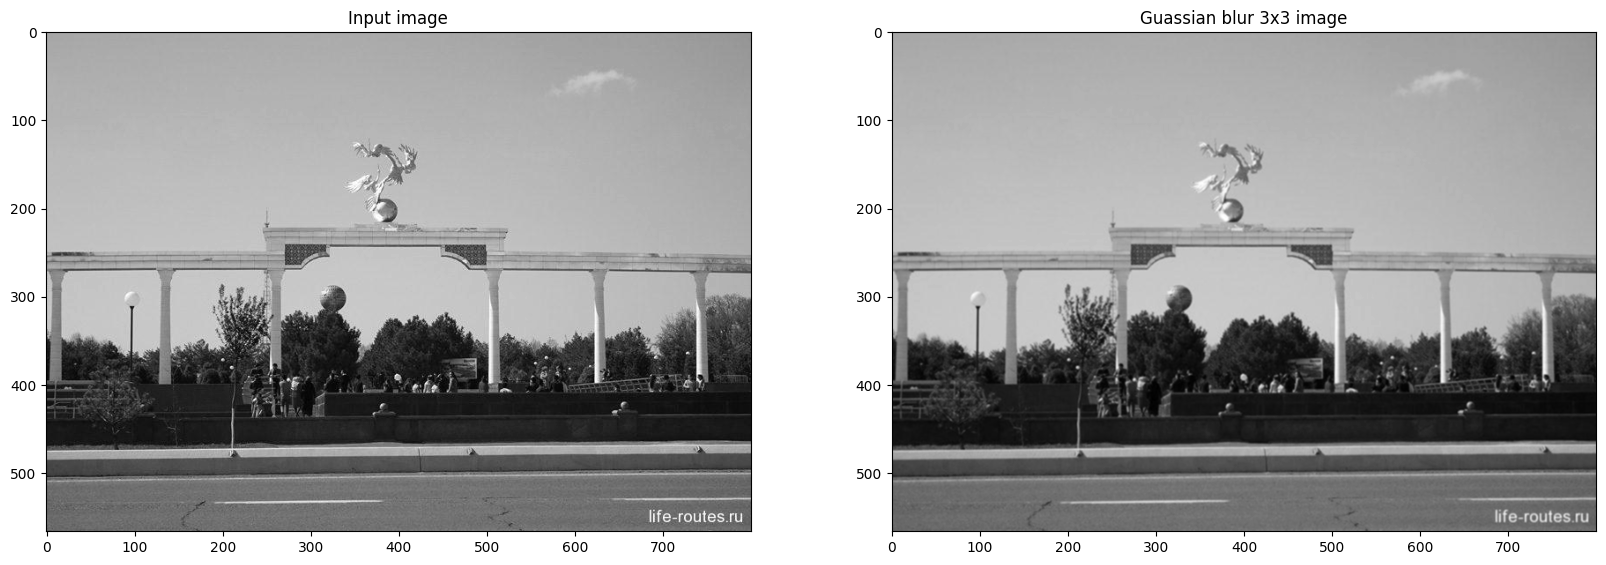

In [9]:
# Guassian 3x3
guassian_3 = cv2.GaussianBlur(img,(3,3),0)
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Input image")
plt.imshow(img,cmap="gray")

plt.subplot(1,2,2)
plt.title("Guassian blur 3x3 image")
plt.imshow(guassian_3, cmap="gray")
plt.show()

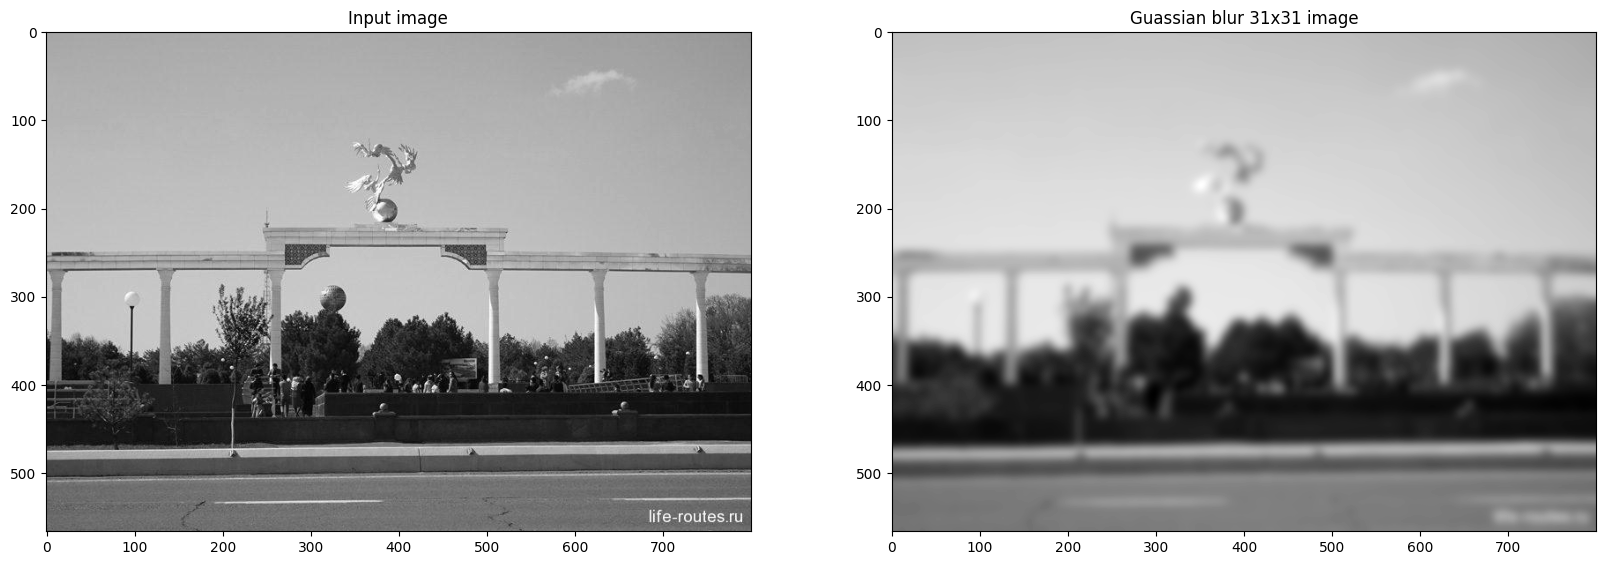

In [10]:
# Guassian 31x31
guassian_31 = cv2.GaussianBlur(img,(31,31),0)
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Input image")
plt.imshow(img,cmap="gray")

plt.subplot(1,2,2)
plt.title("Guassian blur 31x31 image")
plt.imshow(guassian_31, cmap="gray")
plt.show()

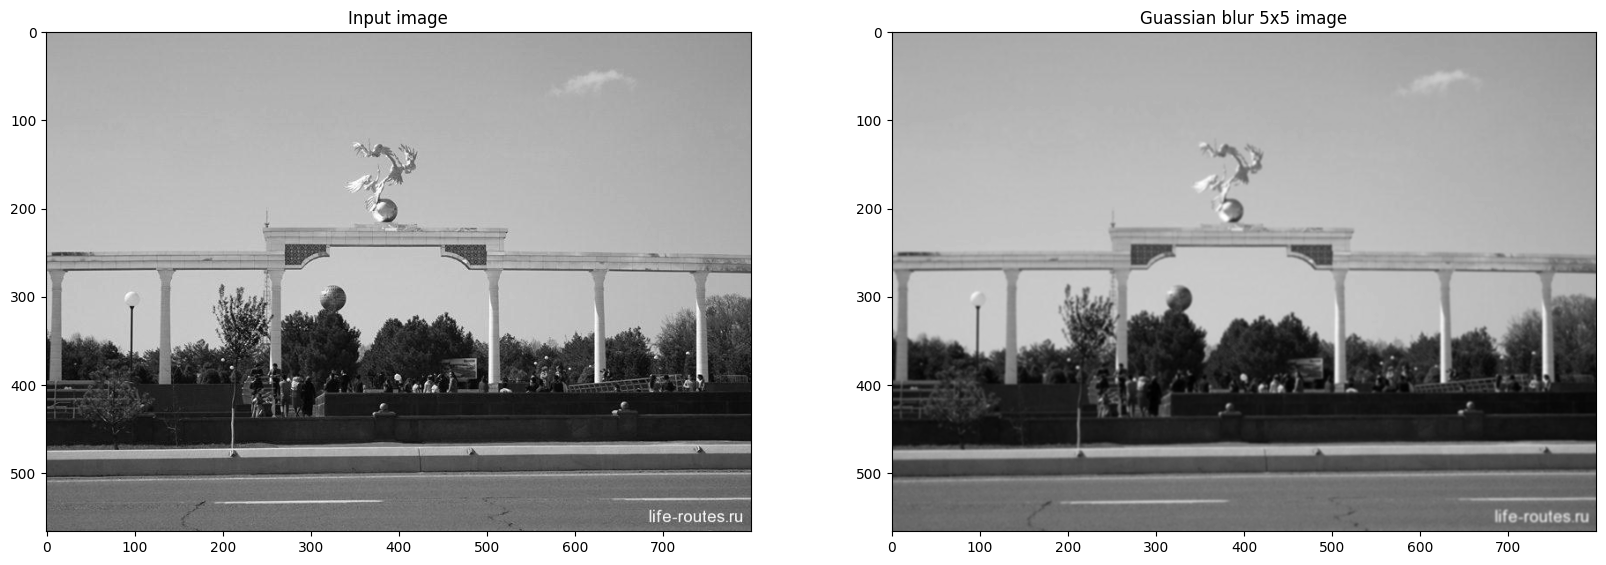

In [11]:
# Guassian 5x5
guassian_5 = cv2.GaussianBlur(img,(5,5),0)
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Input image")
plt.imshow(img,cmap="gray")

plt.subplot(1,2,2)
plt.title("Guassian blur 5x5 image")
plt.imshow(guassian_5, cmap="gray")
plt.show()

* If we filter the Gaussian image by x we can find the edges more clearly 

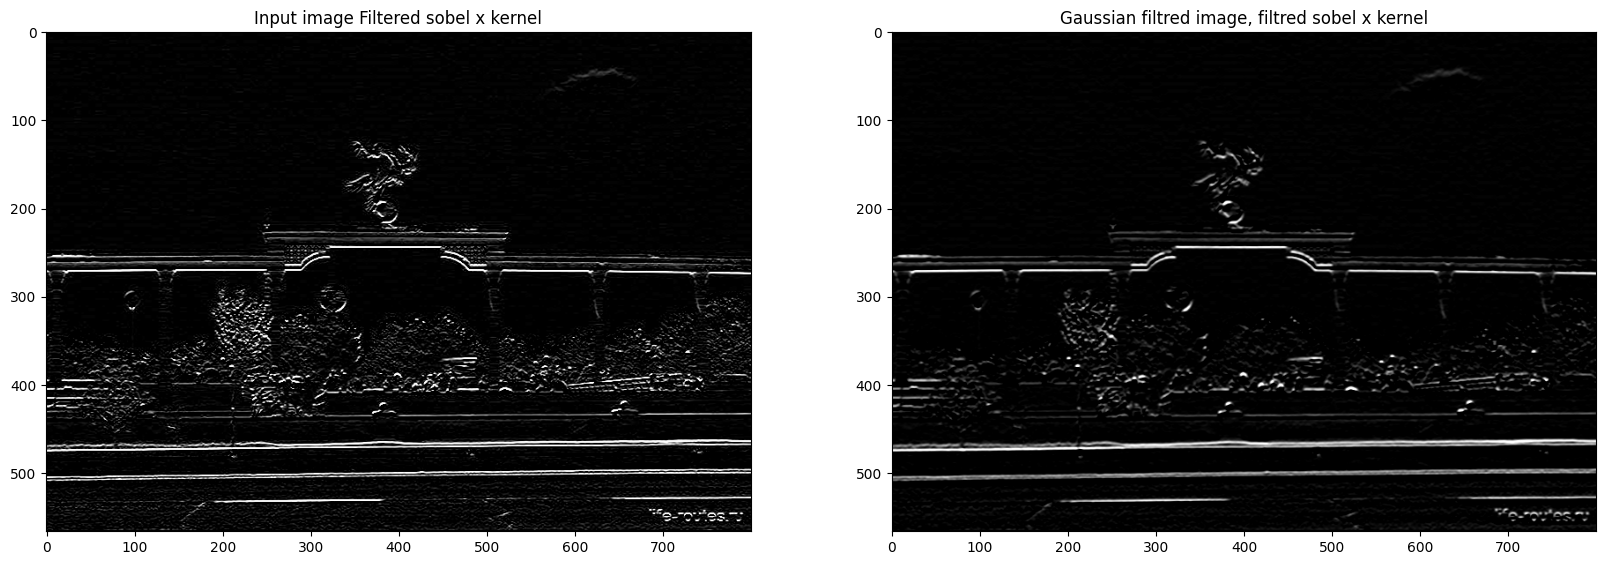

In [12]:
sobel_x_kernel = np.array([[-1,-2,-1],
                          [0,0,0],
                          [1,2,1]])

filter_sobel_x = cv2.filter2D(img,-1,sobel_x_kernel)
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Input image Filtered sobel x kernel")
plt.imshow(filter_sobel_x,cmap='gray')

filter_blur = cv2.filter2D(guassian_5,-1,sobel_x_kernel)  # guassian_5 image
plt.subplot(1,2,2)
plt.title("Gaussian filtred image, filtred sobel x kernel")
plt.imshow(filter_blur,cmap='gray')
plt.show()

* Threshold method, through this method we can transform edges into 2 numeric representations, 0 and 255

` In the top cell filter_sobel_x image and filter_blur image to 0 and 255 `

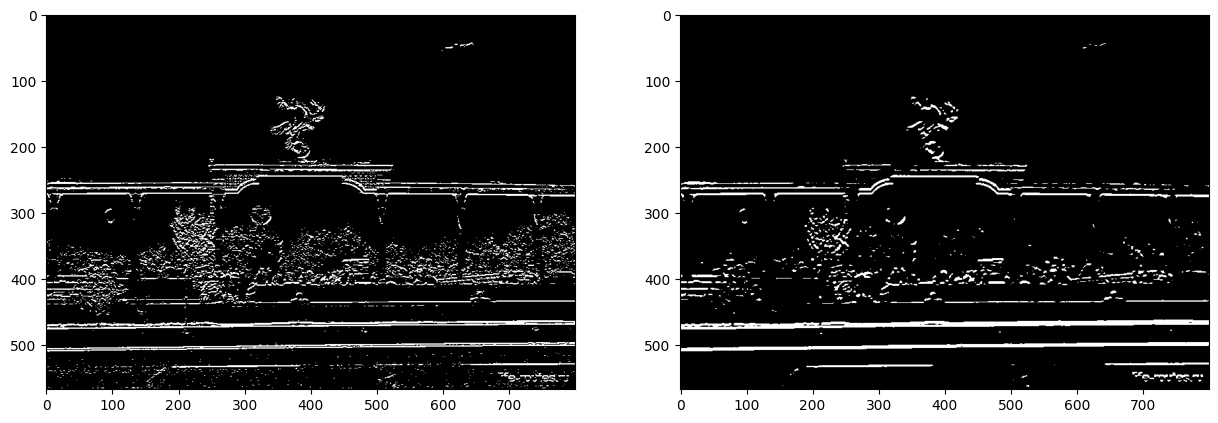

In [13]:
ret, img_thresh1 = cv2.threshold(filter_sobel_x,50,255,cv2.THRESH_BINARY) 
ret2, img_thresh2 = cv2.threshold(filter_blur,50,255,cv2.THRESH_BINARY)
plt.figure(figsize=(15,7.5))

plt.subplot(121)
plt.imshow(img_thresh1,cmap='gray')

plt.subplot(122)
plt.imshow(img_thresh2,cmap='gray')
plt.show()
# we see the difference

# Canny function in OpenCV

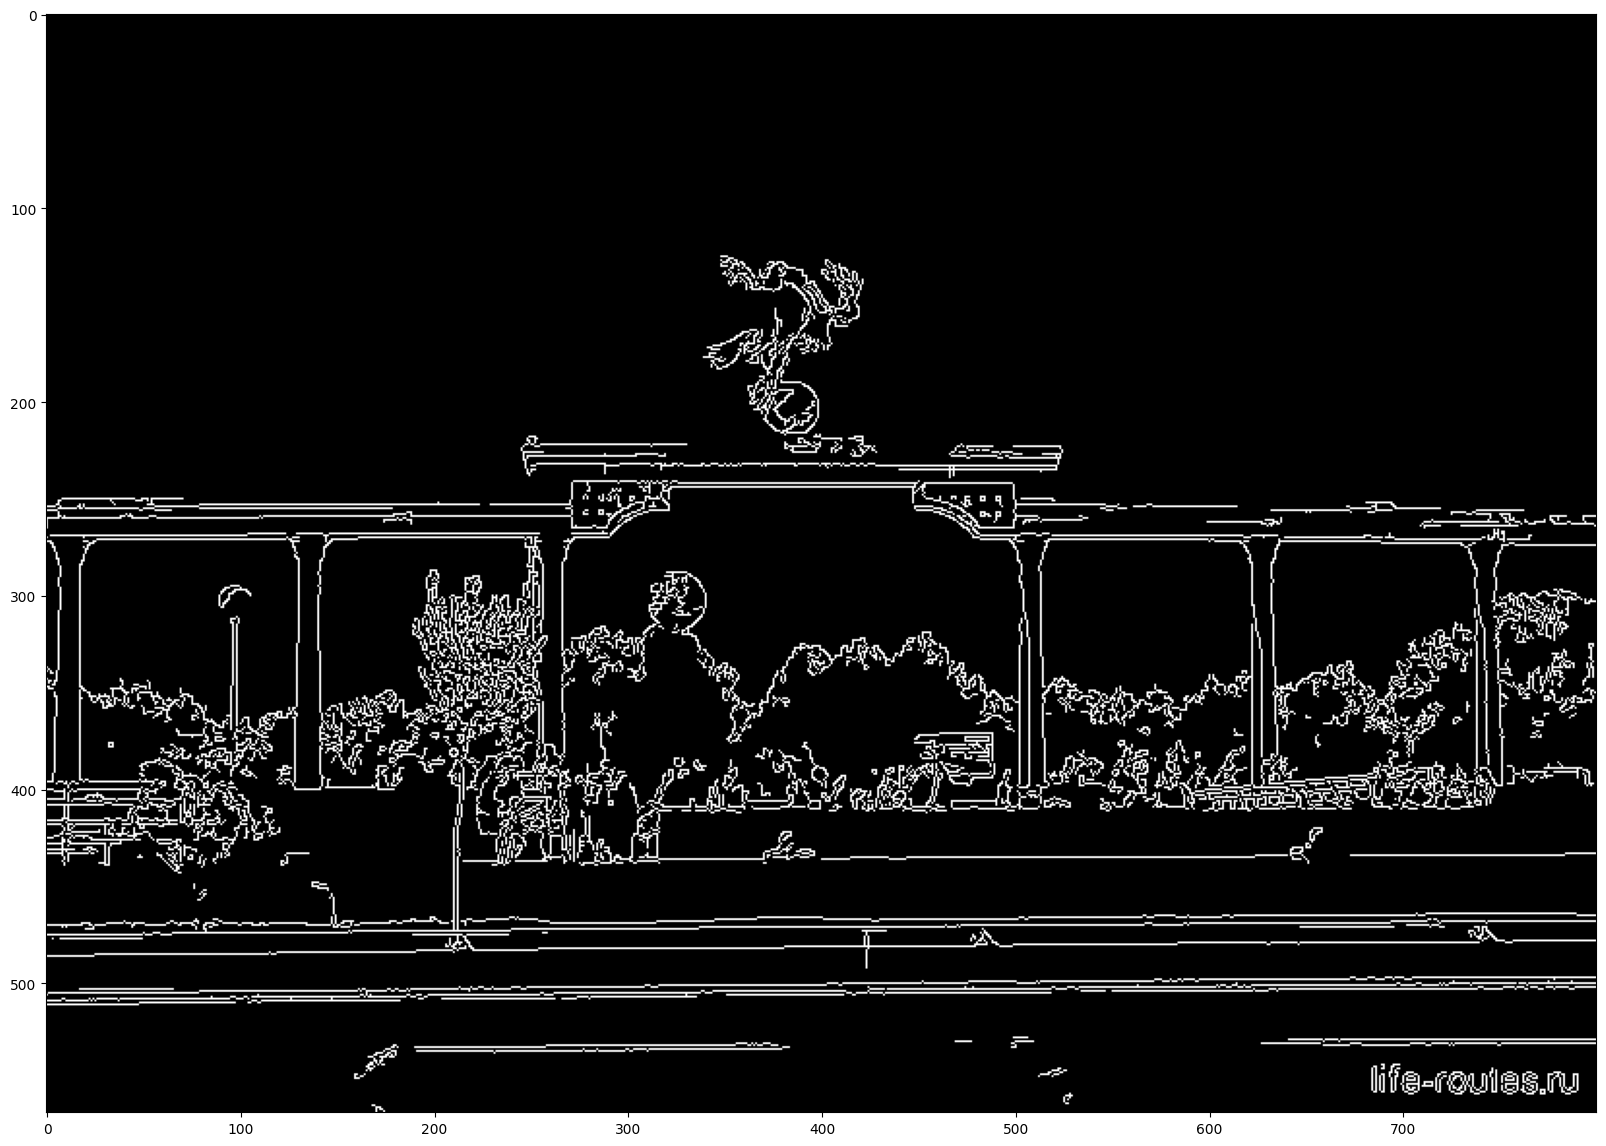

In [14]:
img_canny = cv2.Canny(img,100,250)
plt.figure(figsize=(20,20))
plt.imshow(img_canny,cmap='gray')
plt.show()

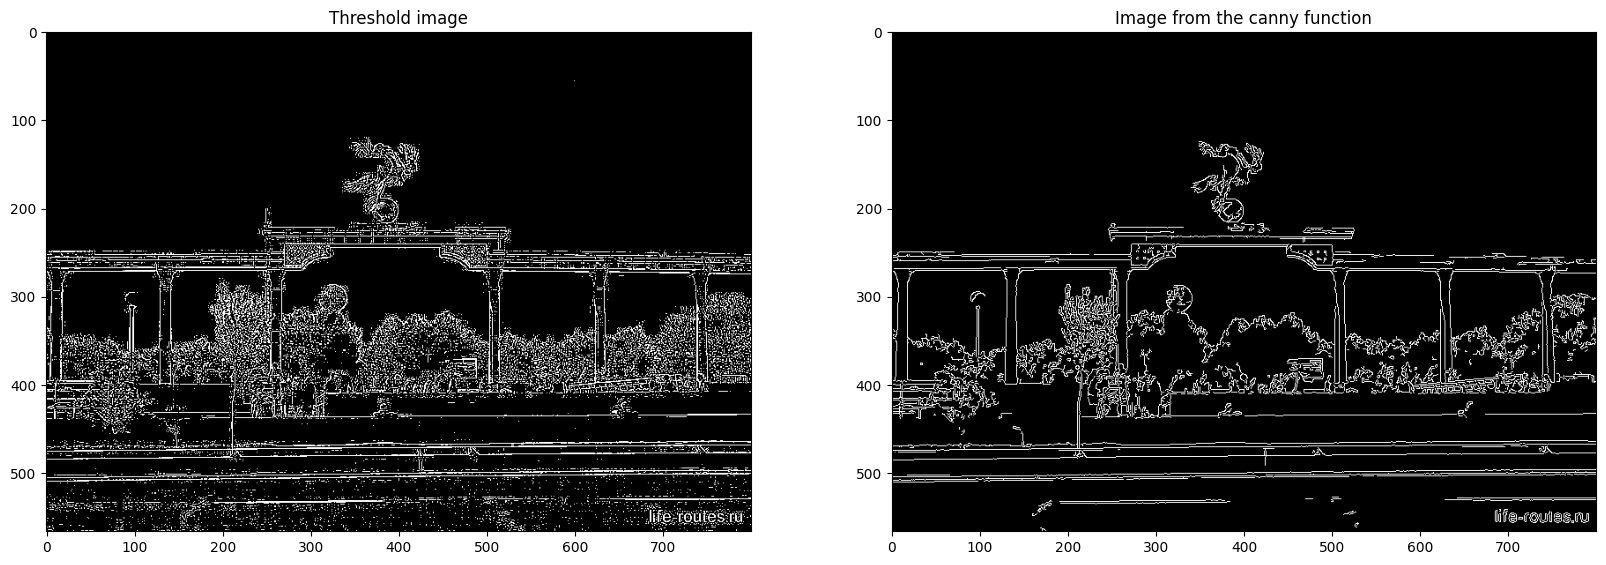

In [15]:
ret3, img_threshedge = cv2.threshold(edge_filter_img,50,255,cv2.THRESH_BINARY) 
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Threshold image")
plt.imshow(img_threshedge,cmap='gray')


plt.subplot(1,2,2)
plt.title("Image from the canny function")
plt.imshow(img_canny,cmap='gray')
plt.show()

# Both images are composed of 0 and 255

# <center> <h1> 👨‍💻   🚀